In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
import pandas as pd
import os

print(os.getcwd())
# Combine features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

# Simplify 'num' to binary classification
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
data.drop('num', axis=1, inplace=True)

# Display first few rows to confirm changes
print(data.head())

/Users/jalen/Documents/code/24Fall_CSCI6806_Group10/models
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       1  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define features and target
features = data.drop(columns=['target'])
target = data['target']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.80      0.86      0.83        43

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91

SVM Accuracy: 0.8351648351648352


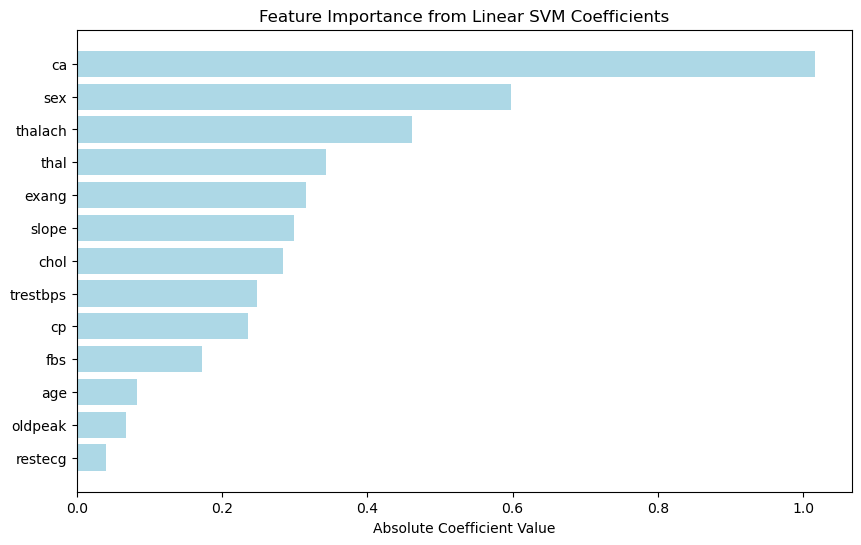

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model performance
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Extract feature importance (coefficients) from SVM model
svm_feature_importance = np.abs(svm_model.coef_[0])
features_names = data.drop(columns=['target']).columns

# Plot feature importance from SVM
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(svm_feature_importance)[::-1]
plt.barh(features_names[sorted_indices], svm_feature_importance[sorted_indices], color='lightblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Linear SVM Coefficients')
plt.gca().invert_yaxis()
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.80      0.86      0.83        43

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91

SVM Accuracy: 0.8351648351648352


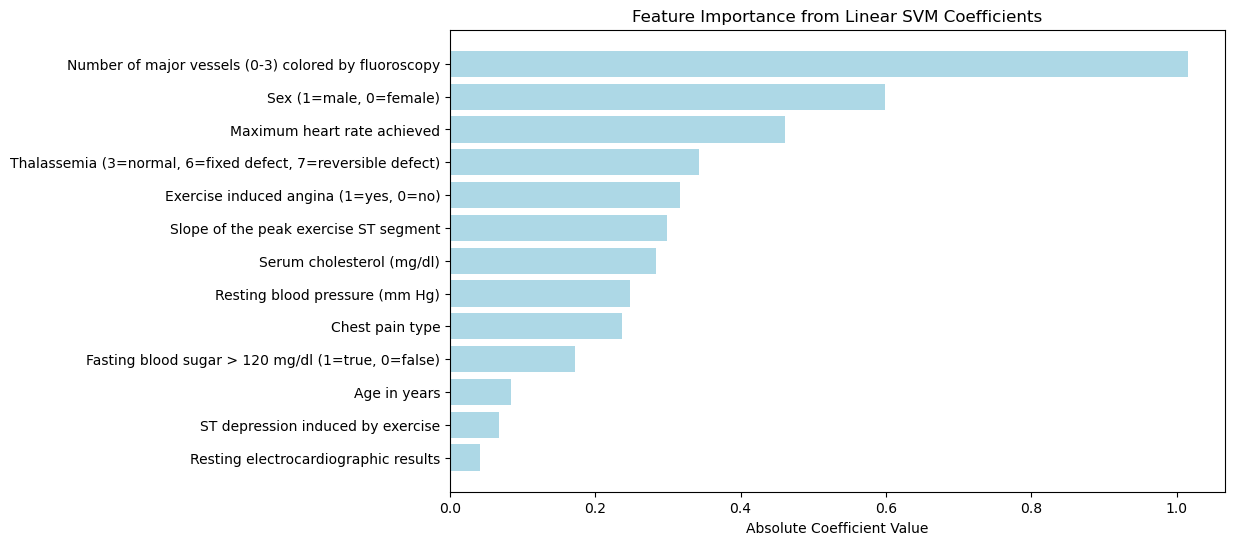

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.80      0.81      0.80        43

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

XGBoost Accuracy: 0.8131868131868132


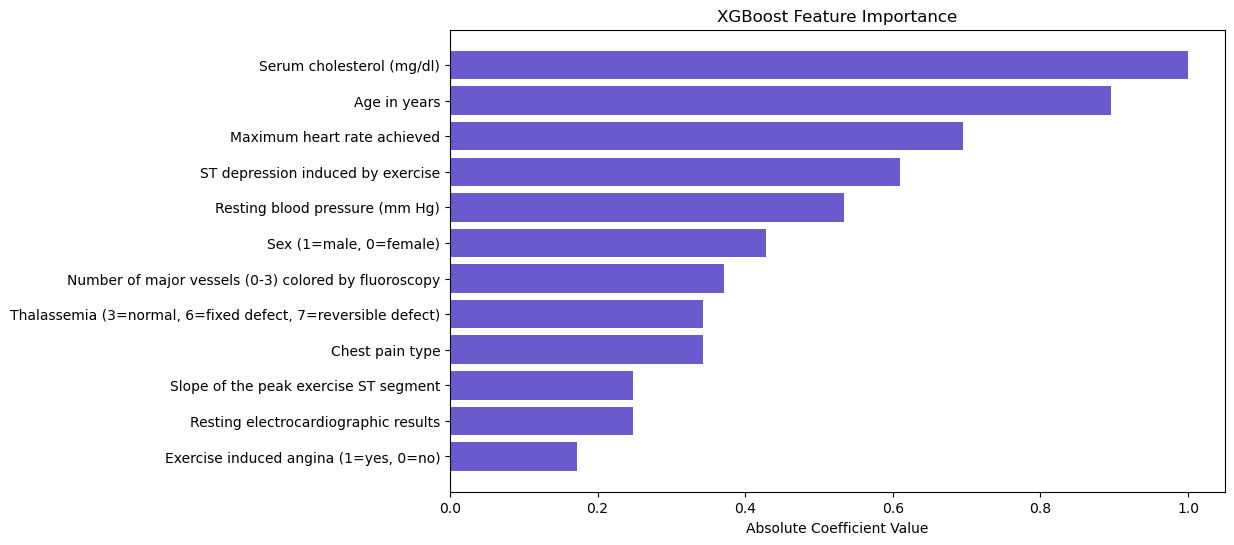

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'heart_disease_data.csv'
df = pd.read_csv(file_path)

# Rename columns to match the provided feature names
df.rename(columns={
    'age': 'Age in years',
    'sex': 'Sex (1=male, 0=female)',
    'cp': 'Chest pain type',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1=true, 0=false)',
    'restecg': 'Resting electrocardiographic results',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1=yes, 0=no)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of the peak exercise ST segment',
    'ca': 'Number of major vessels (0-3) colored by fluoroscopy',
    'thal': 'Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)',
    'num': 'Diagnosis of heart disease'
}, inplace=True)

# Convert 'Diagnosis of heart disease' to binary classification
df['target'] = df['Diagnosis of heart disease'].apply(lambda x: 1 if x > 0 else 0)
df.drop('Diagnosis of heart disease', axis=1, inplace=True)

# Define features and target
features = df.drop(columns=['target'])
target = df['target']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model performance
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Extract feature importance (coefficients) from SVM model
svm_feature_importance = np.abs(svm_model.coef_[0])
features_names = features.columns

# Plot feature importance from SVM
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(svm_feature_importance)[::-1]
plt.barh(features_names[sorted_indices], svm_feature_importance[sorted_indices], color='lightblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Linear SVM Coefficients')
plt.gca().invert_yaxis()
plt.show()

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Get feature importance from XGBoost model
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')
xgb_features = [features_names[int(f[1:])] for f in xgb_importance.keys()]
xgb_importance_values = list(xgb_importance.values())

# Normalize XGBoost feature importance values to be on a similar scale as SVM
xgb_importance_values = np.array(xgb_importance_values) / np.max(xgb_importance_values)

# Sort features by importance value
sorted_indices = np.argsort(xgb_importance_values)[::-1]
sorted_features = [xgb_features[i] for i in sorted_indices]
sorted_importance_values = [xgb_importance_values[i] for i in sorted_indices]

# Plot XGBoost feature importance as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance_values, color='slateblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # To display highest importance at the top
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.80      0.86      0.83        43

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91

SVM Accuracy: 0.8351648351648352


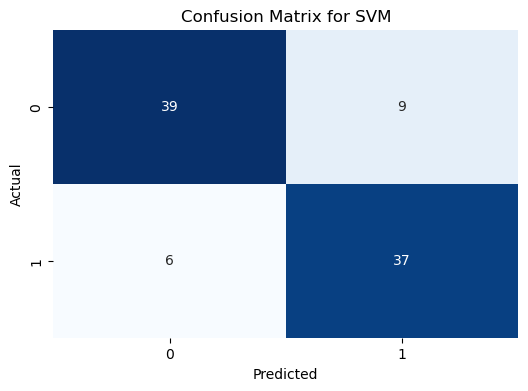

SVM False Positive Rate: 0.0000


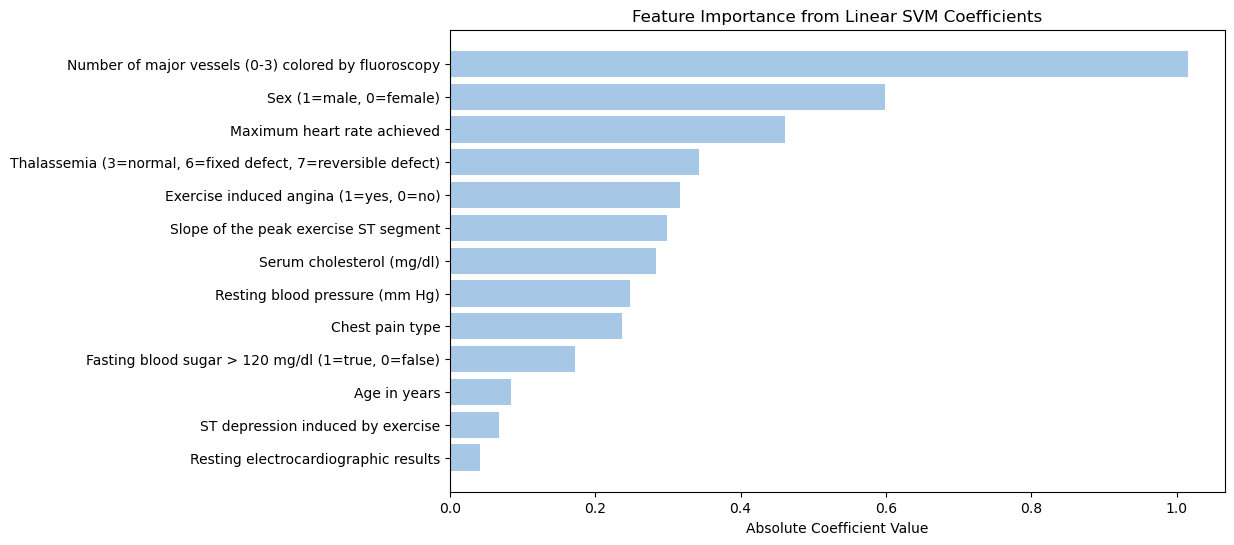

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.80      0.81      0.80        43

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

XGBoost Accuracy: 0.8131868131868132


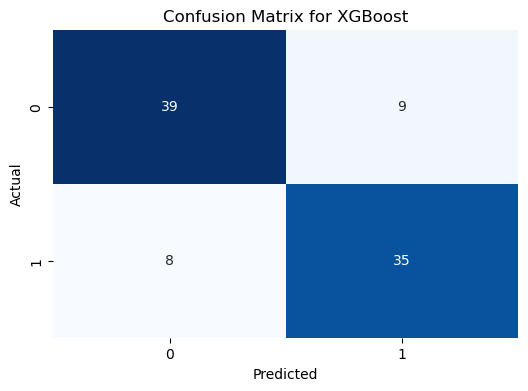

XGBoost False Positive Rate: 0.0000


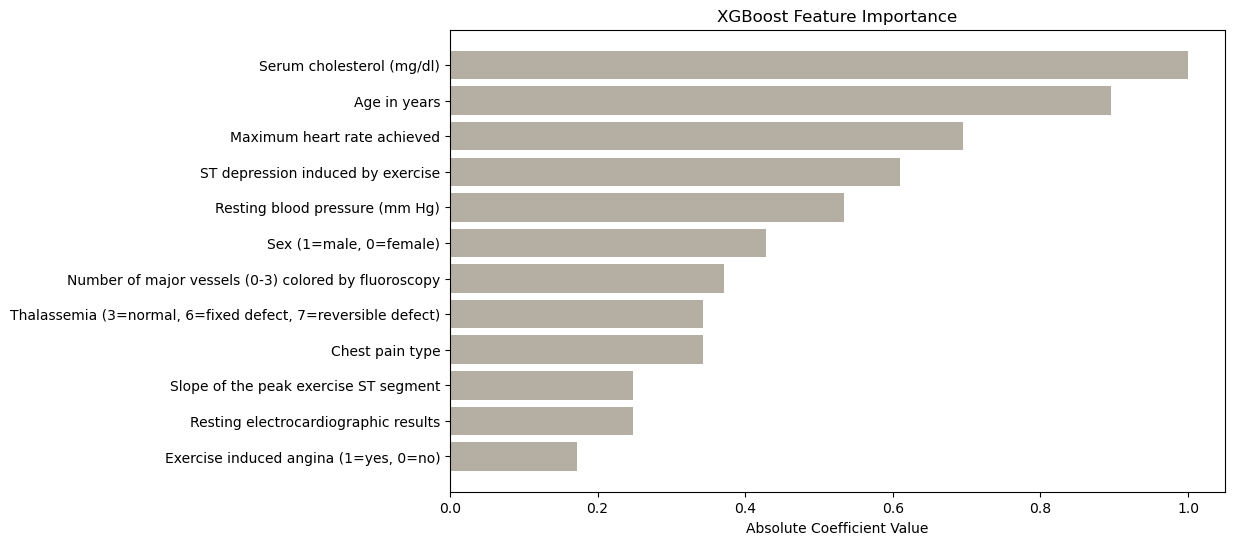

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart_disease_data.csv'
df = pd.read_csv(file_path)

# Rename columns to match the provided feature names
df.rename(columns={
    'age': 'Age in years',
    'sex': 'Sex (1=male, 0=female)',
    'cp': 'Chest pain type',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1=true, 0=false)',
    'restecg': 'Resting electrocardiographic results',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1=yes, 0=no)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of the peak exercise ST segment',
    'ca': 'Number of major vessels (0-3) colored by fluoroscopy',
    'thal': 'Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)',
    'num': 'Diagnosis of heart disease'
}, inplace=True)

# Convert 'Diagnosis of heart disease' to binary classification
df['target'] = df['Diagnosis of heart disease'].apply(lambda x: 1 if x > 0 else 0)
df.drop('Diagnosis of heart disease', axis=1, inplace=True)

# Define features and target
features = df.drop(columns=['target'])
target = df['target']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model performance
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# False positive rate for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
false_positive_rate_svm = fpr_svm[1]
print(f"SVM False Positive Rate: {false_positive_rate_svm:.4f}")

# Extract feature importance (coefficients) from SVM model
svm_feature_importance = np.abs(svm_model.coef_[0])
features_names = features.columns

# Plot feature importance from SVM
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(svm_feature_importance)[::-1]
plt.barh(features_names[sorted_indices], svm_feature_importance[sorted_indices], color='#A7C7E7')  # Molandi color
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Linear SVM Coefficients')
plt.gca().invert_yaxis()
plt.show()

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# False positive rate for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
false_positive_rate_xgb = fpr_xgb[1]
print(f"XGBoost False Positive Rate: {false_positive_rate_xgb:.4f}")

# Get feature importance from XGBoost model
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')
xgb_features = [features_names[int(f[1:])] for f in xgb_importance.keys()]
xgb_importance_values = list(xgb_importance.values())

# Normalize XGBoost feature importance values to be on a similar scale as SVM
xgb_importance_values = np.array(xgb_importance_values) / np.max(xgb_importance_values)

# Sort features by importance value
sorted_indices = np.argsort(xgb_importance_values)[::-1]
sorted_features = [xgb_features[i] for i in sorted_indices]
sorted_importance_values = [xgb_importance_values[i] for i in sorted_indices]

# Plot XGBoost feature importance as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance_values, color='#B5AFA3')  # Molandi color
plt.xlabel('Absolute Coefficient Value')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # To display highest importance at the top
plt.show()